<a href="https://colab.research.google.com/github/Fermasango28/Fermasango28/blob/main/Predicccion.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [188]:
import pandas as pd
df = pd.read_csv("/content/sales_predictions.csv")
df.info()
df.head(10)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.300,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.920,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.500,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.200,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.930,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052
5,FDP36,10.395,Regular,0.000000,Baking Goods,51.4008,OUT018,2009,Medium,Tier 3,Supermarket Type2,556.6088
6,FDO10,13.650,Regular,0.012741,Snack Foods,57.6588,OUT013,1987,High,Tier 3,Supermarket Type1,343.5528
7,FDP10,NaN,Low Fat,0.127470,Snack Foods,107.7622,OUT027,1985,Medium,Tier 3,Supermarket Type3,4022.7636
8,FDH17,16.200,Regular,0.016687,Frozen Foods,96.9726,OUT045,2002,NaN,Tier 2,Supermarket Type1,1076.5986
9,FDU28,19.200,Regular,0.094450,Frozen Foods,187.8214,OUT017,2007,NaN,Tier 2,Supermarket Type1,4710.5350


In [189]:
df.isna().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [190]:
for i in df:
  print(df[i].value_counts())

Item_Identifier
FDW13    10
FDG33    10
NCY18     9
FDD38     9
DRE49     9
         ..
FDY43     1
FDQ60     1
FDO33     1
DRF48     1
FDC23     1
Name: count, Length: 1559, dtype: int64
Item_Weight
12.150    86
17.600    82
13.650    77
11.800    76
15.100    68
          ..
7.275      2
7.685      1
9.420      1
6.520      1
5.400      1
Name: count, Length: 415, dtype: int64
Item_Fat_Content
Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: count, dtype: int64
Item_Visibility
0.000000    526
0.076975      3
0.162462      2
0.076841      2
0.073562      2
           ... 
0.013957      1
0.110460      1
0.124646      1
0.054142      1
0.044878      1
Name: count, Length: 7880, dtype: int64
Item_Type
Fruits and Vegetables    1232
Snack Foods              1200
Household                 910
Frozen Foods              856
Dairy                     682
Canned                    649
Baking Goods              648
Health and Hygiene        520
Soft Drinks  

Item_Fat_Content modificar
Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112

In [191]:
df["Item_Fat_Content"].replace("LF", "Low Fat",inplace = True)
df["Item_Fat_Content"].replace("reg", "Regular",inplace = True)
df["Item_Fat_Content"].replace("low fat", "Low Fat",inplace = True)

In [192]:
df = df[df["Item_Visibility"]> 0]

Los locales que más venden son los que Tier 3.

In [193]:
lista = df['Outlet_Identifier'].unique()
lista.sort()
for i in lista:
  print("Identificador: ",i, df[df['Outlet_Identifier']==i]["Outlet_Size"].value_counts())

Identificador:  OUT010 Series([], Name: count, dtype: int64)
Identificador:  OUT013 Outlet_Size
High    873
Name: count, dtype: int64
Identificador:  OUT017 Series([], Name: count, dtype: int64)
Identificador:  OUT018 Outlet_Size
Medium    863
Name: count, dtype: int64
Identificador:  OUT019 Outlet_Size
Small    498
Name: count, dtype: int64
Identificador:  OUT027 Outlet_Size
Medium    875
Name: count, dtype: int64
Identificador:  OUT035 Outlet_Size
Small    876
Name: count, dtype: int64
Identificador:  OUT045 Series([], Name: count, dtype: int64)
Identificador:  OUT046 Outlet_Size
Small    869
Name: count, dtype: int64
Identificador:  OUT049 Outlet_Size
Medium    877
Name: count, dtype: int64


In [194]:
df[df['Outlet_Size'].isna()]["Outlet_Identifier"].unique()

array(['OUT045', 'OUT017', 'OUT010'], dtype=object)

In [195]:
lista = df['Item_Type'].unique()
for i in lista:
  print("Identificador: ",i, df[df['Item_Type']==i]["Item_Weight"].describe())

Identificador:  Dairy count    535.000000
mean      13.495841
std        4.662950
min        4.805000
25%        9.300000
50%       13.350000
75%       17.650000
max       20.700000
Name: Item_Weight, dtype: float64
Identificador:  Soft Drinks count    346.000000
mean      11.939624
std        4.383911
min        4.590000
25%        8.270000
50%       11.800000
75%       15.462500
max       20.750000
Name: Item_Weight, dtype: float64
Identificador:  Meat count    321.000000
mean      12.793489
std        4.660803
min        5.150000
25%        9.300000
50%       12.350000
75%       17.200000
max       21.250000
Name: Item_Weight, dtype: float64
Identificador:  Snack Foods count    931.000000
mean      13.017202
std        4.562147
min        5.095000
25%        9.195000
50%       13.150000
75%       17.000000
max       21.250000
Name: Item_Weight, dtype: float64
Identificador:  Frozen Foods count    678.000000
mean      12.885922
std        4.468109
min        4.555000
25%        8.985

In [196]:
df.groupby("Outlet_Location_Type")["Item_Outlet_Sales"].sum()

Outlet_Location_Type
Tier 1    4.223880e+06
Tier 2    6.066612e+06
Tier 3    7.131576e+06
Name: Item_Outlet_Sales, dtype: float64

In [197]:
df1 = df.groupby(["Item_Type"])[["Item_MRP","Item_Outlet_Sales"]].mean()

El producto menos vendido es la comida marina

In [198]:
df1["Item_Outlet_Sales"] = df.groupby(["Item_Type"])["Item_Outlet_Sales"].sum()
df1 = df1.sort_values(by = "Item_Outlet_Sales")
df1

,Item_MRP,Item_Outlet_Sales
Item_Type,,
Seafood,139.897653,1.382201e+05
Breakfast,141.404351,2.268148e+05
Starchy Foods,147.282323,3.046235e+05
Others,133.177460,3.048652e+05
Hard Drinks,136.980029,4.216318e+05
Breads,140.617709,5.088317e+05
Soft Drinks,131.184960,8.221964e+05
Meat,140.257052,8.770104e+05
Health and Hygiene,131.348089,9.753384e+05


In [199]:
df2 = df.groupby(["Item_Visibility"])[["Item_MRP","Item_Outlet_Sales"]].mean()
df2["Item_Outlet_Sales"] = df.groupby(["Item_Visibility"])["Item_Outlet_Sales"].sum()
df2.sort_values(by = "Item_Outlet_Sales",inplace= True)
df2 = df2.reset_index()

Se puede apreciar que ni aunque tenga mayor visibilidad el costo y ganancias promedio aumentan.

In [200]:
df3 = df2[df2["Item_Visibility"] > df2["Item_Visibility"].mean()]
df3.mean()

Item_Visibility         0.118867
Item_MRP              140.857125
Item_Outlet_Sales    2076.748821
dtype: float64

In [201]:
df4 = df2[df2["Item_Visibility"] <= df2["Item_Visibility"].mean()]
df4.mean()

Item_Visibility         0.036500
Item_MRP              141.209191
Item_Outlet_Sales    2304.765151
dtype: float64

In [202]:
import matplotlib.pyplot as plt
import seaborn as sns

Se puede apreciar que el local que más vende es el TIER3

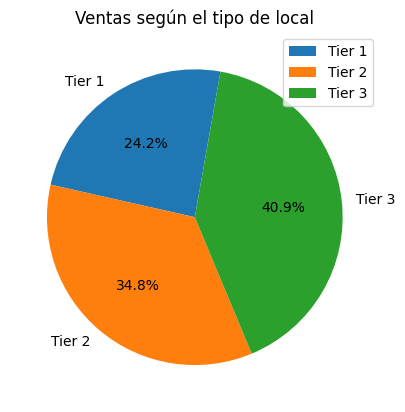

In [203]:
df_local = df.groupby("Outlet_Location_Type")["Item_Outlet_Sales"].sum()
plt.figure(dpi=100)
plt.pie(df_local.values, labels = df_local.index,autopct="%.1f%%",startangle=80)
plt.title("Ventas según el tipo de local")
plt.legend(loc='upper right')
plt.show()


Se aprecia que los productos más vendidos son los vegetales y frutas y los snacks, no solo en cantidad sino tambien en ventas.

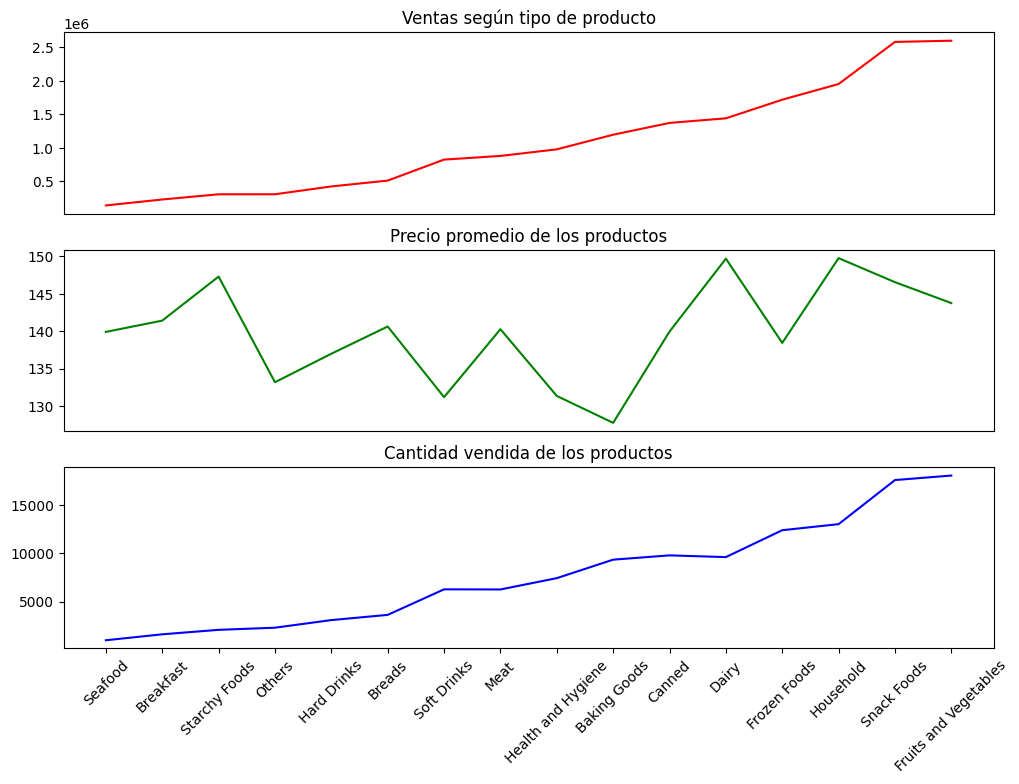

In [204]:
df1["Cantidad"] = round(df1["Item_Outlet_Sales"]/df1["Item_MRP"])
plt.figure(figsize = (12,8))
ax1 = plt.subplot(3,1,1)
ax1.plot(df1.index, df1["Item_Outlet_Sales"],c="red")
ax1.set_title("Ventas según tipo de producto")
ax1.get_xaxis().set_visible(False)
ax2 = plt.subplot(3,1,2)
ax2.plot(df1.index, df1["Item_MRP"],c="green")
ax2.set_title("Precio promedio de los productos")
ax2.get_xaxis().set_visible(False)
ax3 = plt.subplot(3,1,3)
ax3.plot(df1.index, df1["Cantidad"],c="blue")
ax3.set_title("Cantidad vendida de los productos")
ax3.tick_params(axis='x', rotation=45)
plt.show()

In [205]:
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import make_column_selector, make_column_transformer
from sklearn.impute import SimpleImputer
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import train_test_split
from sklearn import set_config
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neighbors import KNeighborsRegressor

In [206]:
df.info()
df

<class 'pandas.core.frame.DataFrame'>
Index: 7997 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            7997 non-null   object 
 1   Item_Weight                6624 non-null   float64
 2   Item_Fat_Content           7997 non-null   object 
 3   Item_Visibility            7997 non-null   float64
 4   Item_Type                  7997 non-null   object 
 5   Item_MRP                   7997 non-null   float64
 6   Outlet_Identifier          7997 non-null   object 
 7   Outlet_Establishment_Year  7997 non-null   int64  
 8   Outlet_Size                5731 non-null   object 
 9   Outlet_Location_Type       7997 non-null   object 
 10  Outlet_Type                7997 non-null   object 
 11  Item_Outlet_Sales          7997 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 812.2+ KB


,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.300,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.920,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.500,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
6,FDO10,13.650,Regular,0.012741,Snack Foods,57.6588,OUT013,1987,High,Tier 3,Supermarket Type1,343.5528
7,FDP10,NaN,Low Fat,0.127470,Snack Foods,107.7622,OUT027,1985,Medium,Tier 3,Supermarket Type3,4022.7636
...,...,...,...,...,...,...,...,...,...,...,...,...
8518,FDF22,6.865,Low Fat,0.056783,Snack Foods,214.5218,OUT013,1987,High,Tier 3,Supermarket Type1,2778.3834
8519,FDS36,8.380,Regular,0.046982,Baking Goods,108.1570,OUT045,2002,NaN,Tier 2,Supermarket Type1,549.2850
8520,NCJ29,10.600,Low Fat,0.035186,Health and Hygiene,85.1224,OUT035,2004,Small,Tier 2,Supermarket Type1,1193.1136
8521,FDN46,7.210,Regular,0.145221,Snack Foods,103.1332,OUT018,2009,Medium,Tier 3,Supermarket Type2,1845.5976


In [207]:
colum_cat= df.select_dtypes(exclude=['int64', 'float64'])
for columna in colum_cat:
  print(f"Value counts para la columna '{columna}':")
  print(len(df[columna].unique()))
  print(df[columna].unique())

Value counts para la columna 'Item_Identifier':
1559
['FDA15' 'DRC01' 'FDN15' ... 'NCW05' 'NCT53' 'FDP15']
Value counts para la columna 'Item_Fat_Content':
2
['Low Fat' 'Regular']
Value counts para la columna 'Item_Type':
16
['Dairy' 'Soft Drinks' 'Meat' 'Snack Foods' 'Frozen Foods'
 'Fruits and Vegetables' 'Breakfast' 'Health and Hygiene' 'Hard Drinks'
 'Baking Goods' 'Household' 'Canned' 'Breads' 'Starchy Foods' 'Others'
 'Seafood']
Value counts para la columna 'Outlet_Identifier':
10
['OUT049' 'OUT018' 'OUT013' 'OUT027' 'OUT045' 'OUT017' 'OUT046' 'OUT035'
 'OUT019' 'OUT010']
Value counts para la columna 'Outlet_Size':
4
['Medium' 'High' nan 'Small']
Value counts para la columna 'Outlet_Location_Type':
3
['Tier 1' 'Tier 3' 'Tier 2']
Value counts para la columna 'Outlet_Type':
4
['Supermarket Type1' 'Supermarket Type2' 'Supermarket Type3'
 'Grocery Store']


Como hemos verificado anteriormente, los identificadores de las tiendas son los que en el tamaño no tienen datos, por lo tanto se realizarán 2 estudios, uno eliminando la columna Outlet_Size y otra eliminando los valores nulos de esta columna. Asimismo, eliminaremos la columna Item_Identifier dado que no brinda ninguna informacion importante. Además, se eliminaran los datos nulos item_weigth.

In [208]:
df = df.drop(columns = ["Item_Identifier"])
df.dropna(subset=['Item_Weight'],inplace = True)
df1 = df[df['Outlet_Size'].notna()]
df2 = df.drop(columns = ["Outlet_Size"])
df1

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,9.300,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,5.920,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,17.500,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
6,13.650,Regular,0.012741,Snack Foods,57.6588,OUT013,1987,High,Tier 3,Supermarket Type1,343.5528
11,18.500,Regular,0.045464,Dairy,144.1102,OUT046,1997,Small,Tier 1,Supermarket Type1,2187.1530
...,...,...,...,...,...,...,...,...,...,...,...
8517,20.750,Regular,0.083607,Frozen Foods,178.8318,OUT046,1997,Small,Tier 1,Supermarket Type1,3608.6360
8518,6.865,Low Fat,0.056783,Snack Foods,214.5218,OUT013,1987,High,Tier 3,Supermarket Type1,2778.3834
8520,10.600,Low Fat,0.035186,Health and Hygiene,85.1224,OUT035,2004,Small,Tier 2,Supermarket Type1,1193.1136
8521,7.210,Regular,0.145221,Snack Foods,103.1332,OUT018,2009,Medium,Tier 3,Supermarket Type2,1845.5976


In [209]:
df2

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,9.300,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Tier 1,Supermarket Type1,3735.1380
1,5.920,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Tier 3,Supermarket Type2,443.4228
2,17.500,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Tier 1,Supermarket Type1,2097.2700
6,13.650,Regular,0.012741,Snack Foods,57.6588,OUT013,1987,Tier 3,Supermarket Type1,343.5528
8,16.200,Regular,0.016687,Frozen Foods,96.9726,OUT045,2002,Tier 2,Supermarket Type1,1076.5986
...,...,...,...,...,...,...,...,...,...,...
8518,6.865,Low Fat,0.056783,Snack Foods,214.5218,OUT013,1987,Tier 3,Supermarket Type1,2778.3834
8519,8.380,Regular,0.046982,Baking Goods,108.1570,OUT045,2002,Tier 2,Supermarket Type1,549.2850
8520,10.600,Low Fat,0.035186,Health and Hygiene,85.1224,OUT035,2004,Tier 2,Supermarket Type1,1193.1136
8521,7.210,Regular,0.145221,Snack Foods,103.1332,OUT018,2009,Tier 3,Supermarket Type2,1845.5976


<Axes: >

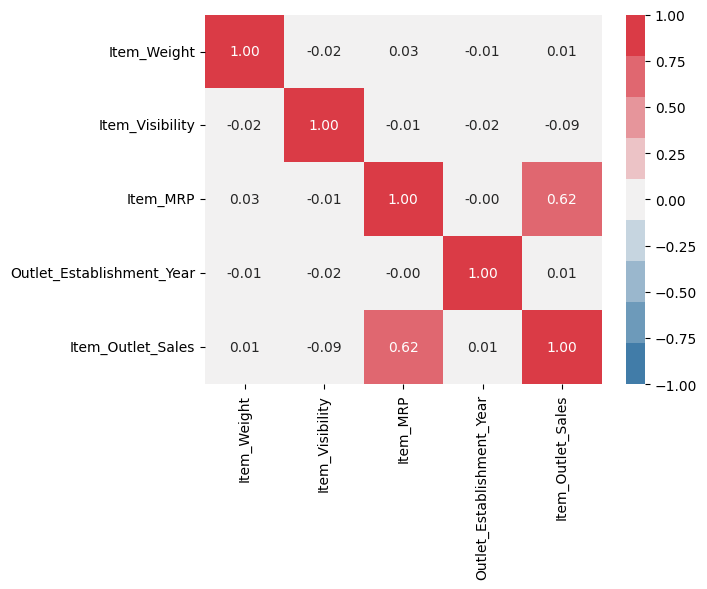

In [210]:
lista = df.select_dtypes(exclude=['object']).columns
sns.heatmap(df[lista].corr(), cmap = sns.diverging_palette(240, 10, n=9), annot=True, fmt='.2f', vmin=-1, vmax=1)

# ANALISIS CON LA PRIMERA DATA

In [211]:
y = df1["Item_Outlet_Sales"]
x = df1.drop(columns = ["Item_Outlet_Sales"])

In [212]:
cat_selector = make_column_selector(dtype_include='object')
num_selector = make_column_selector(dtype_include='number')

one_hot_encoder = OneHotEncoder()
standard_scaler = StandardScaler()

imputer_num = SimpleImputer(strategy="mean")
imputer_cat = SimpleImputer(strategy="most_frequent")

col_transformer = make_column_transformer((standard_scaler, num_selector),(one_hot_encoder, cat_selector),remainder = 'passthrough')
col_transformer.fit(x)
aux=col_transformer.transform(x)
X_procesado=pd.DataFrame(aux.toarray(),columns=col_transformer.get_feature_names_out())
X_procesado.info()
X_procesado

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4358 entries, 0 to 4357
Data columns (total 35 columns):
 #   Column                                          Non-Null Count  Dtype  
---  ------                                          --------------  -----  
 0   standardscaler__Item_Weight                     4358 non-null   float64
 1   standardscaler__Item_Visibility                 4358 non-null   float64
 2   standardscaler__Item_MRP                        4358 non-null   float64
 3   standardscaler__Outlet_Establishment_Year       4358 non-null   float64
 4   onehotencoder__Item_Fat_Content_Low Fat         4358 non-null   float64
 5   onehotencoder__Item_Fat_Content_Regular         4358 non-null   float64
 6   onehotencoder__Item_Type_Baking Goods           4358 non-null   float64
 7   onehotencoder__Item_Type_Breads                 4358 non-null   float64
 8   onehotencoder__Item_Type_Breakfast              4358 non-null   float64
 9   onehotencoder__Item_Type_Canned          

,standardscaler__Item_Weight,standardscaler__Item_Visibility,standardscaler__Item_MRP,standardscaler__Outlet_Establishment_Year,onehotencoder__Item_Fat_Content_Low Fat,onehotencoder__Item_Fat_Content_Regular,onehotencoder__Item_Type_Baking Goods,onehotencoder__Item_Type_Breads,onehotencoder__Item_Type_Breakfast,onehotencoder__Item_Type_Canned,...,onehotencoder__Outlet_Identifier_OUT046,onehotencoder__Outlet_Identifier_OUT049,onehotencoder__Outlet_Size_High,onehotencoder__Outlet_Size_Medium,onehotencoder__Outlet_Size_Small,onehotencoder__Outlet_Location_Type_Tier 1,onehotencoder__Outlet_Location_Type_Tier 2,onehotencoder__Outlet_Location_Type_Tier 3,onehotencoder__Outlet_Type_Supermarket Type1,onehotencoder__Outlet_Type_Supermarket Type2
0,-0.774549,-1.129922,1.729471,-0.024756,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0
1,-1.497300,-1.054991,-1.500339,1.330581,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0
2,0.978868,-1.113391,-0.004363,-0.024756,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0
3,0.155617,-1.206600,-1.349864,-1.651160,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
4,1.192700,-0.447695,0.035576,-0.295823,0.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4353,1.673820,0.436914,0.592012,-0.295823,0.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0
4354,-1.295229,-0.185170,1.163968,-1.651160,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
4355,-0.496569,-0.686051,-0.909742,0.652913,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
4356,-1.221457,1.865868,-0.621107,1.330581,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0


In [213]:
X_train, X_test, y_train, y_test = train_test_split(X_procesado, y, random_state = 28)

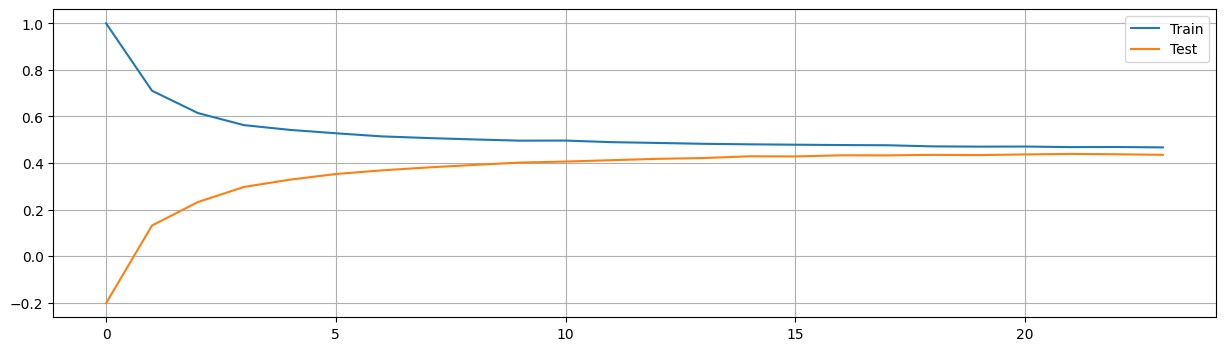

In [219]:
score = []
score1 = []
for i in range(1,25):
  knn_regresion = KNeighborsRegressor(n_neighbors=i)
  knn_regresion.fit(X_train,y_train)
  score.append(knn_regresion.score(X_train,y_train))
  score1.append(knn_regresion.score(X_test,y_test))
plt.figure(figsize=(15, 4))
plt.plot(score)
plt.plot(score1)
plt.legend(["Train","Test"])
plt.grid()

In [216]:
knn_regresion = KNeighborsRegressor(n_neighbors=15)
knn_regresion.fit(X_train,y_train)
y_pred_KNN = knn_regresion.predict(X_test)
print("El score de la regresion KNN con 15 vecinos es: ",knn_regresion.score(X_test,y_test))

El score de la regresion KNN con 15 vecinos es:  0.42874265389156474


In [220]:
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)
y_pred_lineal = lin_reg.predict(X_test)
print("El score de la regresion lineal es: ",lin_reg.score(X_test,y_test))

El score de la regresion lineal es:  0.48400318663258957


# ANALISIS CON LA DATA 2

In [221]:
y = df2["Item_Outlet_Sales"]
x = df2.drop(columns = ["Item_Outlet_Sales"])

In [222]:
col_transformer.fit(x)
aux=col_transformer.transform(x)
X_procesado=pd.DataFrame(aux.toarray(),columns=col_transformer.get_feature_names_out())
X_procesado.info()
X_procesado

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6624 entries, 0 to 6623
Data columns (total 36 columns):
 #   Column                                          Non-Null Count  Dtype  
---  ------                                          --------------  -----  
 0   standardscaler__Item_Weight                     6624 non-null   float64
 1   standardscaler__Item_Visibility                 6624 non-null   float64
 2   standardscaler__Item_MRP                        6624 non-null   float64
 3   standardscaler__Outlet_Establishment_Year       6624 non-null   float64
 4   onehotencoder__Item_Fat_Content_Low Fat         6624 non-null   float64
 5   onehotencoder__Item_Fat_Content_Regular         6624 non-null   float64
 6   onehotencoder__Item_Type_Baking Goods           6624 non-null   float64
 7   onehotencoder__Item_Type_Breads                 6624 non-null   float64
 8   onehotencoder__Item_Type_Breakfast              6624 non-null   float64
 9   onehotencoder__Item_Type_Canned          

,standardscaler__Item_Weight,standardscaler__Item_Visibility,standardscaler__Item_MRP,standardscaler__Outlet_Establishment_Year,onehotencoder__Item_Fat_Content_Low Fat,onehotencoder__Item_Fat_Content_Regular,onehotencoder__Item_Type_Baking Goods,onehotencoder__Item_Type_Breads,onehotencoder__Item_Type_Breakfast,onehotencoder__Item_Type_Canned,...,onehotencoder__Outlet_Identifier_OUT035,onehotencoder__Outlet_Identifier_OUT045,onehotencoder__Outlet_Identifier_OUT046,onehotencoder__Outlet_Identifier_OUT049,onehotencoder__Outlet_Location_Type_Tier 1,onehotencoder__Outlet_Location_Type_Tier 2,onehotencoder__Outlet_Location_Type_Tier 3,onehotencoder__Outlet_Type_Grocery Store,onehotencoder__Outlet_Type_Supermarket Type1,onehotencoder__Outlet_Type_Supermarket Type2
0,-0.770131,-1.103185,1.738564,-0.225658,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0
1,-1.497957,-1.034806,-1.493063,1.294176,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
2,0.995601,-1.088100,0.003754,-0.225658,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0
3,0.166568,-1.173156,-1.342504,-2.049458,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
4,0.715668,-1.089644,-0.712120,0.230292,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6619,-1.294467,-0.241058,1.172742,-2.049458,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
6620,-0.968237,-0.448482,-0.532782,0.230292,0.0,1.0,1.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
6621,-0.490198,-0.698133,-0.902134,0.534259,1.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
6622,-1.220177,1.630603,-0.613337,1.294176,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0


In [223]:
X_train, X_test, y_train, y_test = train_test_split(X_procesado, y, random_state = 28)

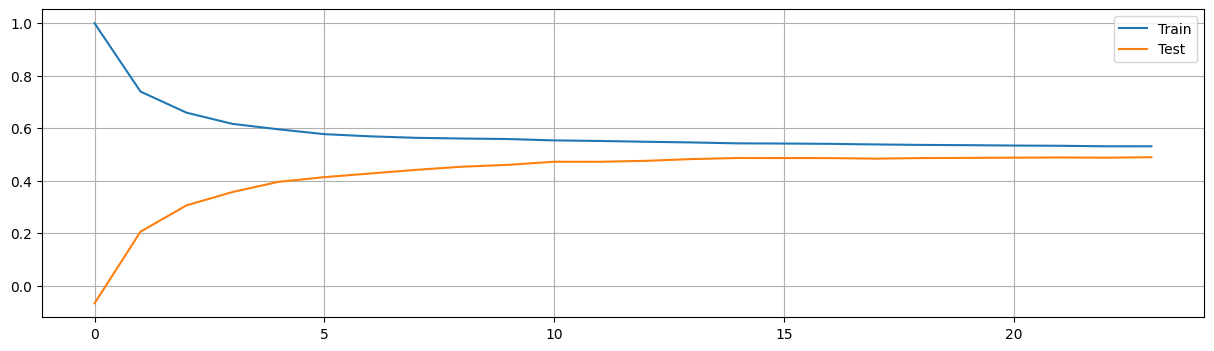

In [224]:
score = []
score1 = []
for i in range(1,25):
  knn_regresion = KNeighborsRegressor(n_neighbors=i)
  knn_regresion.fit(X_train,y_train)
  score.append(knn_regresion.score(X_train,y_train))
  score1.append(knn_regresion.score(X_test,y_test))
plt.figure(figsize=(15, 4))
plt.plot(score)
plt.plot(score1)
plt.legend(["Train","Test"])
plt.grid()

In [225]:
knn_regresion = KNeighborsRegressor(n_neighbors=15)
knn_regresion.fit(X_train,y_train)
y_pred_KNN = knn_regresion.predict(X_test)
print("El score de la regresion KNN con 15 vecinos es: ",knn_regresion.score(X_test,y_test))

El score de la regresion KNN con 15 vecinos es:  0.48665836684265384


In [226]:
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)
y_pred_lineal = lin_reg.predict(X_test)
print("El score de la regresion lineal es: ",lin_reg.score(X_test,y_test))

El score de la regresion lineal es:  0.5036835003446674


# Podemos verificar que al eliminar la columna Outlet_Size el modelo mostro mejores resultados, por lo que si se puede ir probando eliminando otras columnas para ver su peso sobre la prediccion. Asimismo, verificamos que la regresion lineal para este caso se acomoda mejor a los datos que la regresion de KNN.